In [146]:
import  numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os
import warnings
warnings.filterwarnings('ignore')

In [147]:
df=pd.read_csv("/Users/abhishekraturi/Downloads/car_data1.csv")

In [148]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [149]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [151]:
df.shape

(301, 9)

In [152]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [153]:
#Checking for null values
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [154]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [155]:
#Checing for duplicated values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [156]:
#Fiding unique values
#df['Car_Name'].unique()
#df['Year'].unique()
#df['Selling_Price'].unique()
#df['Present_Price'].unique()
#df['Kms_Driven'].unique()
#df['Fuel_Type'].unique()
#df['Seller_Type'].unique()
#df['Transmission'].unique()
df['Owner'].unique()

array([0, 1, 3])

In [157]:
# Printing the Unique values with their counts

print(df.Fuel_Type.value_counts(),"\n")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 



In [158]:
# Feature Engineering - Creating a new Feature called age_of_car
df['current_year']='2021'
df['current_year'] = df['current_year'].astype(int)
df['age_of_car']=df['current_year'] - df['Year']

In [159]:
#Dropping the Year and Current Year as no longer required
df.drop(['Year','current_year'],inplace=True, axis=1)

In [160]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


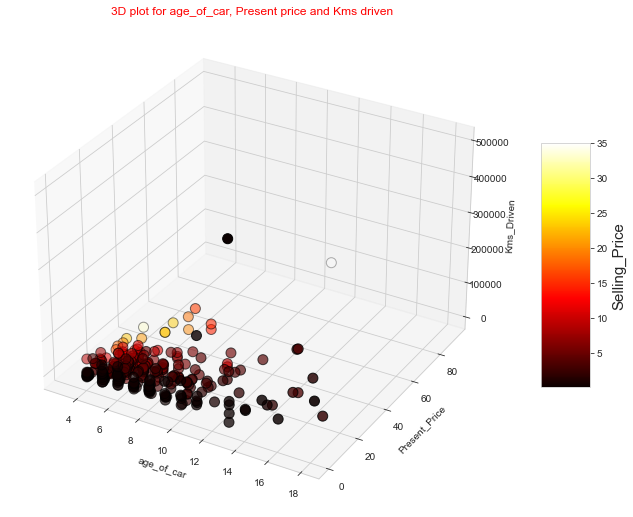

In [161]:
# Most of the cars are 4 - 10 years old


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["age_of_car"],
           df["Present_Price"],
           df["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=df["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("age_of_car")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for age_of_car, Present price and Kms driven",color="red")
plt.show()

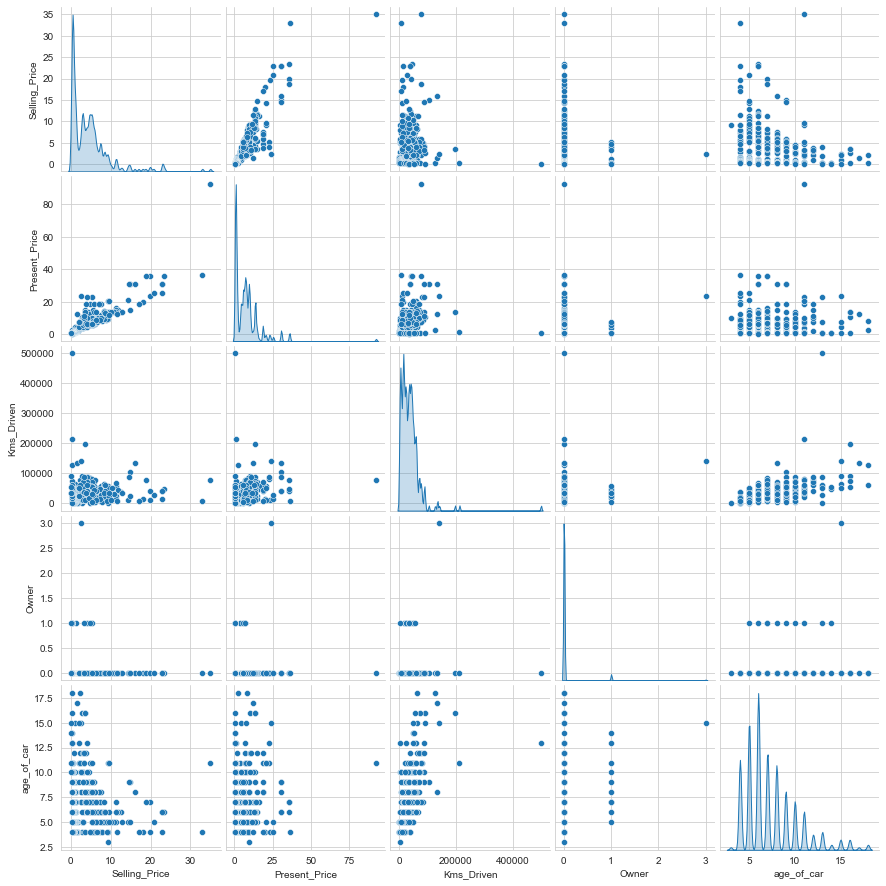

In [162]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

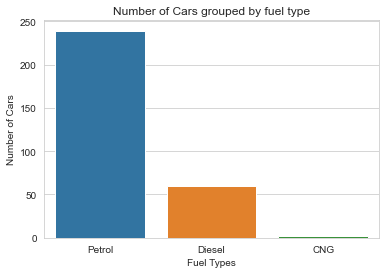

In [163]:
# Number of cars grouped by fuel type


sns.countplot(data=df,x="Fuel_Type")
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show()

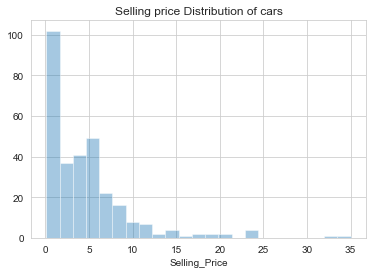

In [164]:
# Selling Pric Distribution of Cars

sns.distplot(df.Selling_Price, kde=False)
plt.title('Selling price Distribution of cars')
plt.show()

<AxesSubplot:xlabel='Selling_Price'>

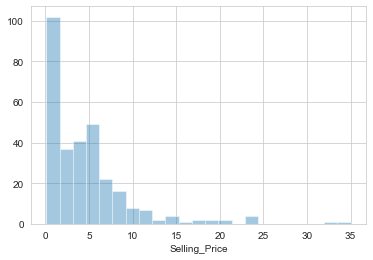

In [165]:
sns.distplot(df['Selling_Price'],kde=False)

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

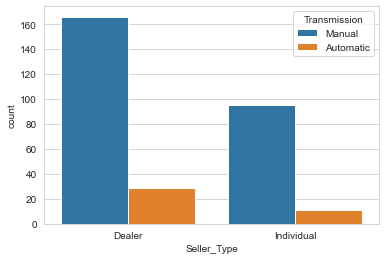

In [166]:
# More number of manual cars
sns.set_style('whitegrid')
sns.countplot(x='Seller_Type',hue='Transmission',data=df)

In [167]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


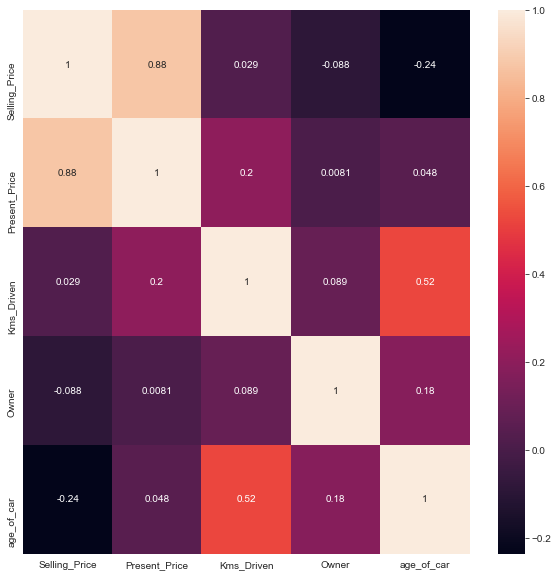

In [168]:
corr = df.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corr_features].corr(), annot=True)

In [169]:
x = df.corr().sort_values(by="Selling_Price", ascending=False)
print(x['Selling_Price'])

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
age_of_car      -0.236141
Name: Selling_Price, dtype: float64


In [170]:
# Important Features
#X = final.iloc[:,1:]
#y = final.iloc[:,0]
#from sklearn.ensemble import ExtraTreesRegressor
#model = ExtraTreesRegressor()
#model.fit(X,y)
#print(model.feature_importances_)
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
#feat_importances.nlargest(5).plot(kind='barh')
#plt.show()

In [171]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [172]:
df['brand'] = df.Car_Name.str.split(' ').str.get(0).str.upper()

In [173]:
df['brand'].unique()

array(['RITZ', 'SX4', 'CIAZ', 'WAGON', 'SWIFT', 'VITARA', 'S', 'ALTO',
       'ERTIGA', 'DZIRE', 'IGNIS', '800', 'BALENO', 'OMNI', 'FORTUNER',
       'INNOVA', 'COROLLA', 'ETIOS', 'CAMRY', 'LAND', 'ROYAL', 'UM',
       'KTM', 'BAJAJ', 'HYOSUNG', 'MAHINDRA', 'HONDA', 'YAMAHA', 'TVS',
       'HERO', 'ACTIVA', 'SUZUKI', 'I20', 'GRAND', 'I10', 'EON', 'XCENT',
       'ELANTRA', 'CRETA', 'VERNA', 'CITY', 'BRIO', 'AMAZE', 'JAZZ'],
      dtype=object)

In [174]:
df['brand'] = df['brand'].replace(['RITZ', 'SWIFT','VITARA','ERTIGA','IGNIS','BALENO','SX4','CIAZ','WAGON','S','DZIRE','ALTO','800','OMNI'], 'MARUTI SUZUKI')
df['brand'] = df['brand'].replace(['FORTUNER','INNOVA','COROLLA','ETIOS','CAMRY','LAND'], 'TOYOTA')
df['brand'] = df['brand'].replace(['CRETA','ELANTRA','VERNA','I20', 'GRAND', 'I10','EON','XCENT'], 'HYUNDAI')
df['brand'] = df['brand'].replace(['UM'], 'UM MOTORCYCLES')
df['brand'] = df['brand'].replace(['ROYAL'], 'ROYAL ENFIELD')
df['brand'] = df['brand'].replace(['AMAZE','JAZZ','CITY','ACTIVA','BRIO'], 'HONDA')
df['brand'] = df['brand'].replace(['Honda'], 'HONDA')
df['brand'] = df['brand'].replace(['HERO'], 'ROYAL ENFIELD')

In [175]:
df['brand'].unique()

array(['MARUTI SUZUKI', 'TOYOTA', 'ROYAL ENFIELD', 'UM MOTORCYCLES',
       'KTM', 'BAJAJ', 'HYOSUNG', 'MAHINDRA', 'HONDA', 'YAMAHA', 'TVS',
       'SUZUKI', 'HYUNDAI'], dtype=object)

In [176]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,brand
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,MARUTI SUZUKI
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,MARUTI SUZUKI
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,MARUTI SUZUKI
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,MARUTI SUZUKI
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,MARUTI SUZUKI


In [177]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [178]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,MARUTI SUZUKI
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,MARUTI SUZUKI
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,MARUTI SUZUKI
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,MARUTI SUZUKI
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,MARUTI SUZUKI


In [179]:
df['brand'].unique()

array(['MARUTI SUZUKI', 'TOYOTA', 'ROYAL ENFIELD', 'UM MOTORCYCLES',
       'KTM', 'BAJAJ', 'HYOSUNG', 'MAHINDRA', 'HONDA', 'YAMAHA', 'TVS',
       'SUZUKI', 'HYUNDAI'], dtype=object)

In [180]:
print(df.brand.value_counts(),"\n")

HONDA             70
MARUTI SUZUKI     50
HYUNDAI           50
TOYOTA            50
ROYAL ENFIELD     32
BAJAJ             25
YAMAHA             8
TVS                8
KTM                4
UM MOTORCYCLES     1
SUZUKI             1
MAHINDRA           1
HYOSUNG            1
Name: brand, dtype: int64 



In [181]:
df.shape

(301, 9)

In [182]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
age_of_car       0
brand            0
dtype: int64

In [183]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,MARUTI SUZUKI
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,MARUTI SUZUKI
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,MARUTI SUZUKI
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,MARUTI SUZUKI
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,MARUTI SUZUKI


In [184]:
#new_df=pd.get_dummies(df,drop_first=True)

In [185]:
#new_df

In [186]:
new_df=df

In [187]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car,brand
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,MARUTI SUZUKI
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,MARUTI SUZUKI
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,MARUTI SUZUKI
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,MARUTI SUZUKI
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,MARUTI SUZUKI


In [188]:
new_df.drop(['brand'],axis=1,inplace=True)

In [189]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [190]:
new_df=pd.get_dummies(new_df,drop_first=True)

In [191]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [192]:
#print(standardized_X)

[3.77332705e-01 4.09657551e-02 3.41065836e-04 7.72571099e-02
 2.29923847e-01 1.16439769e-02 1.33733050e-01 1.28802491e-01]


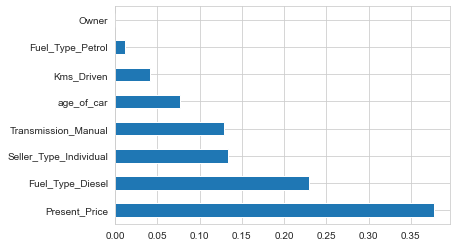

In [193]:
# Important Features
X = new_df.iloc[:,1:9]
y = new_df.iloc[:,0:1]
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [194]:
# Heatmap

new_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


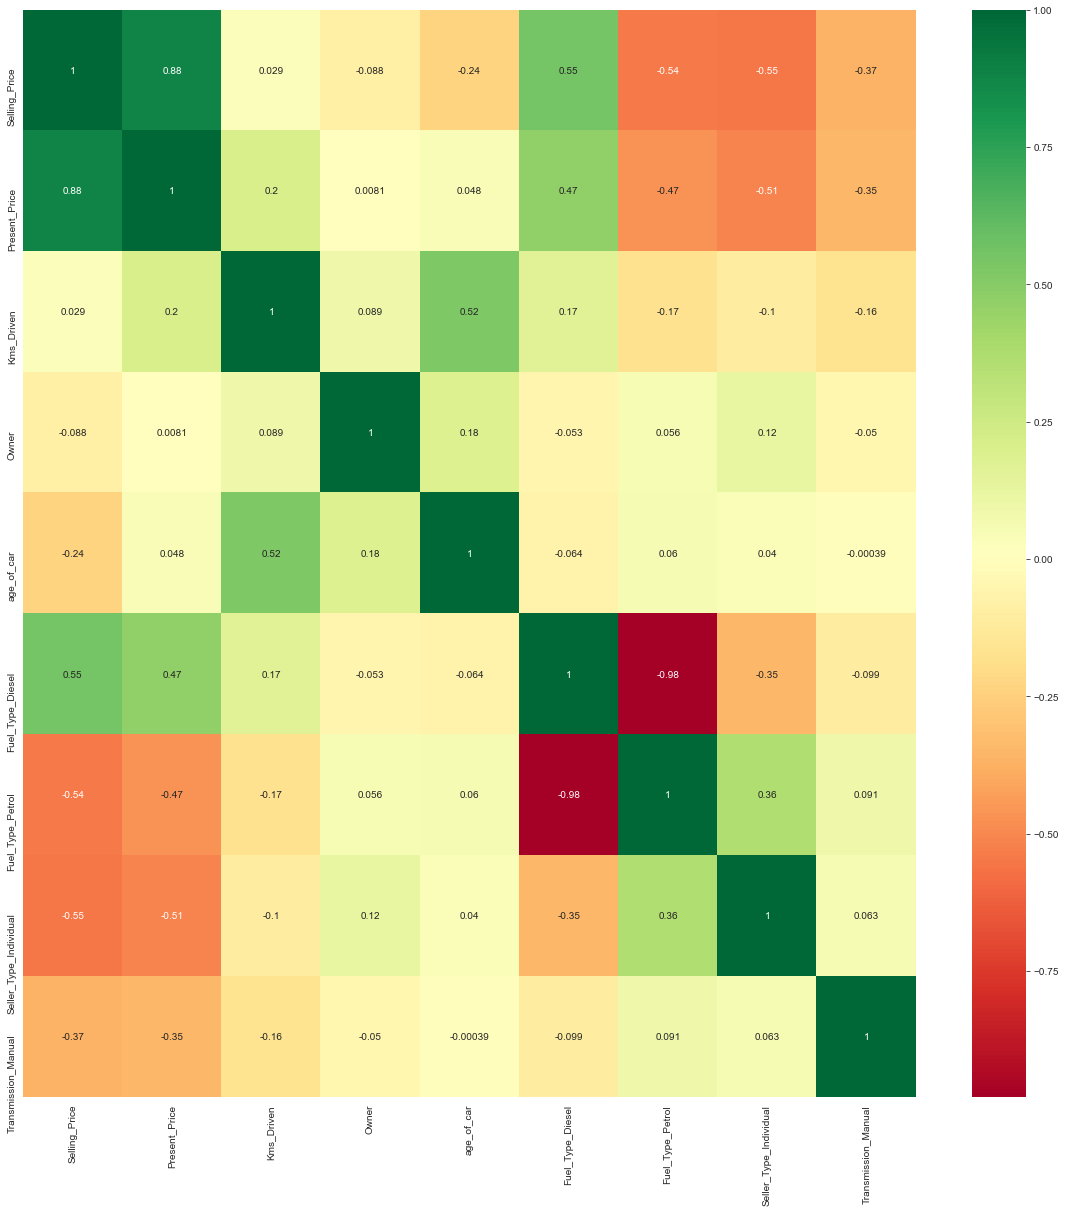

In [195]:
corr = new_df.corr()
corr_features = corr.index
plt.figure(figsize = (20,20))

gg = sns.heatmap(new_df[corr_features].corr().fillna(0.0), annot = True, cmap = 'RdYlGn')

In [196]:
new_df['Selling_Price'].corr(new_df['Present_Price'])

0.8789825451614952

In [197]:
new_df['Selling_Price'].corr(new_df['age_of_car'])

-0.23614098016042734

In [198]:
new_df['Selling_Price'].corr(new_df['Kms_Driven'])

0.02918709067429128

In [199]:
# Owner has an insignificant corrrelation and can be dropped as it does not impact the model building
new_df['Selling_Price'].corr(new_df['Owner'])

-0.08834409908720232

In [200]:
new_df['Selling_Price'].corr(new_df['Fuel_Type_Diesel'])

0.5523392892828554

In [201]:
new_df['Selling_Price'].corr(new_df['Fuel_Type_Petrol'])

-0.5405710829430346

In [202]:
new_df['Selling_Price'].corr(new_df['Present_Price'])

0.8789825451614952

In [203]:
#from sklearn import preprocessing
#X = new_df.iloc[:,1:9]
#y = new_df.iloc[:,0:1]
# standardize the data attributes
#print(y)
#standardized_X = preprocessing.scale(X)

In [204]:
#print(standardized_X)

In [205]:
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [206]:
X = new_df.iloc[:,1:9]
y = new_df.iloc[:,0:1]

In [228]:
#print(X)

In [ ]:
#Pearson coefficients range from +1 to -1, with +1 representing a positive correlation, 
#-1 representing a negative correlation, and 0 representing no relationship.

In [217]:
# Pearson correlation between seeling price and present price
from scipy.stats import pearsonr
list_PresentPrice=new_df['Present_Price']
list_SellingPrice=new_df['Selling_Price']
corr, _ = pearsonr(list_PresentPrice, list_SellingPrice)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.879


In [237]:
# Pearson correlation between selling price and different features
from scipy.stats import pearsonr
list_SellingPrice=new_df['Selling_Price']
for i in new_df.columns:
    list_i=new_df[i]
    corr, _ = pearsonr(list_i, list_SellingPrice)
    print(i)
    print('Pearsons correlation: %.3f' %corr)
    print('\n')

Selling_Price
Pearsons correlation: 1.000


Present_Price
Pearsons correlation: 0.879


Kms_Driven
Pearsons correlation: 0.029


Owner
Pearsons correlation: -0.088


age_of_car
Pearsons correlation: -0.236


Fuel_Type_Diesel
Pearsons correlation: 0.552


Fuel_Type_Petrol
Pearsons correlation: -0.541


Seller_Type_Individual
Pearsons correlation: -0.551


Transmission_Manual
Pearsons correlation: -0.367




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler